In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [4]:
from nltk.stem.snowball import SnowballStemmer

In [254]:
df_train = pd.read_csv('input/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('input/test.csv', encoding='ISO-8859-1')

In [255]:
df_test.shape

(166693, 4)

In [256]:
df_desc = pd.read_csv('input/product_descriptions.csv')

In [257]:
df_train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [258]:
df_desc.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [259]:
df_all = pd.concat((df_train,df_test), axis =0, ignore_index=True)

In [260]:
df_all.head()

,id,product_title,product_uid,relevance,search_term
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet


In [261]:
df_all.shape

(240760, 5)

In [262]:
df_all = pd.merge(df_all, df_desc, how='left', on='product_uid')

In [263]:
df_all.head()

,id,product_title,product_uid,relevance,search_term,product_description
0,2,Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket,"Not only do angles make joints stronger, they ..."
1,3,Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket,"Not only do angles make joints stronger, they ..."
2,9,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over,BEHR Premium Textured DECKOVER is an innovativ...
3,16,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head,Update your bathroom with the Delta Vero Singl...
4,17,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet,Update your bathroom with the Delta Vero Singl...


In [264]:
stemmer =SnowballStemmer('english')

In [265]:
def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [266]:
def str_common_word(str1, str2):
    return sum(int(str2.find(word)>=0) for word in str1.split())

In [267]:
df_all['search_term']=df_all['search_term'].map(lambda x:str_stemmer(x))

In [268]:
df_all['product_title']=df_all['product_title'].map(lambda x:str_stemmer(x))

In [269]:
df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)

In [270]:
df_all['commons in title']=df_all.apply(lambda x:str_common_word(x['search_term'], x['product_title']), axis=1)

In [271]:
df_all['commons in desc']=df_all.apply(lambda x:str_common_word(x['search_term'], x['product_description']), axis=1)

pandas.core.series.Series

In [272]:
df_all = df_all.drop(['search_term','product_title','product_description'],axis=1)

In [273]:
df_all.head()

,id,product_uid,relevance,len_of_query,commons in title,commons in desc
0,2,100001,3.00,2,1,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,1,2
3,16,100005,2.33,3,1,0
4,17,100005,2.67,3,3,0


In [274]:
df_train = df_all.iloc[0:len(df_train)]

In [275]:
df_test = df_all.iloc[len(df_train):]

In [278]:
test_ids = df_test['id']

In [280]:
y_train = df_train['relevance'].values

In [281]:
type(y_train)

numpy.ndarray

In [284]:
X_train = df_train.drop(['id','relevance'], axis=1).values
X_test = df_test.drop(['id','relevance'], axis=1).values

In [285]:
from sklearn.ensemble import RandomForestRegressor

In [286]:
from sklearn.model_selection import cross_val_score

In [287]:
params = [1,3,5,6,7,8,9,10]

In [288]:
test_scores = []

In [289]:
for param in params:
    clf = RandomForestRegressor(n_estimators=30, max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, \
                X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [290]:
import matplotlib.pyplot as plt

In [291]:
%matplotlib inline

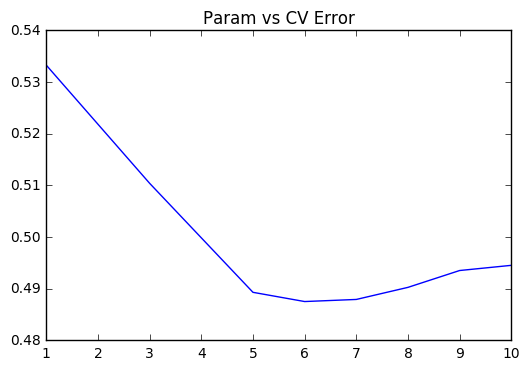

In [292]:
plt.plot(params, test_scores)
plt.title("Param vs CV Error")

In [294]:
rf = RandomForestRegressor(n_estimators=30, max_depth=6)

In [295]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [296]:
y_pred = rf.predict(X_test)

In [297]:
pd.DataFrame({"id": test_ids, "relevance": y_pred}).to_csv(\
'submission.csv', index=False)